# Analisis de Integridad de Datos

- En este analisis se quiere ver la distribucion de la base de datos DEIS de Egresos Hospitalarios.
- Estos resultados se quieren contrastar con los datos del tablero DEIS MINSAL y con los datos de GRD.
- Los datos solamente corresponderan al estrato del Torax

In [2]:
import polars as pl
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import lectura_archivos as fr
import funciones_auxiliares_hito_1 as aux

sns.set_style("darkgrid", rc={'figure.figsize': (12, 6)})

In [3]:
with pl.StringCache():
    df = pl.scan_csv("input/utf-8/*.csv", dtypes=fr.DICT_VARIABLES, separator=";")
    torax = df.filter(pl.col("ESTABLECIMIENTO_SALUD") == 112103)
    torax_pandas = torax.collect().to_pandas()

## Cantidad de Egresos Hospitalarios

- En este caso, se quiere ver la cantidad de egresos hospitalarios por año

In [4]:
numero_egresos_deis = torax_pandas.groupby("ANO_EGRESO")["DIAG1"].count()
display(numero_egresos_deis)

ANO_EGRESO
2001    4985
2002    5043
2003    5326
2004    5261
2005    5333
2006    5232
2007    5084
2008    5132
2009    4690
2010    4538
2011    4662
2012    4453
2013    4435
2014    4409
2015    4621
2016    4872
2017    4901
2018    5482
2019    5435
2020    2848
Name: DIAG1, dtype: int64

## Cantidad de Valores Faltantes

,cantidad_na,porcentaje_na
ID_PACIENTE,0,0.00
ESTABLECIMIENTO_SALUD,0,0.00
GLOSA_ESTABLECIMIENTO_SALUD,0,0.00
PERTENENCIA_ESTABLECIMIENTO_SALUD,0,0.00
SEREMI,96742,100.00
SERVICIO_DE_SALUD,0,0.00
SEXO,0,0.00
FECHA_NACIMIENTO,24879,25.72
EDAD_CANT,10028,10.37
TIPO_EDAD,10028,10.37


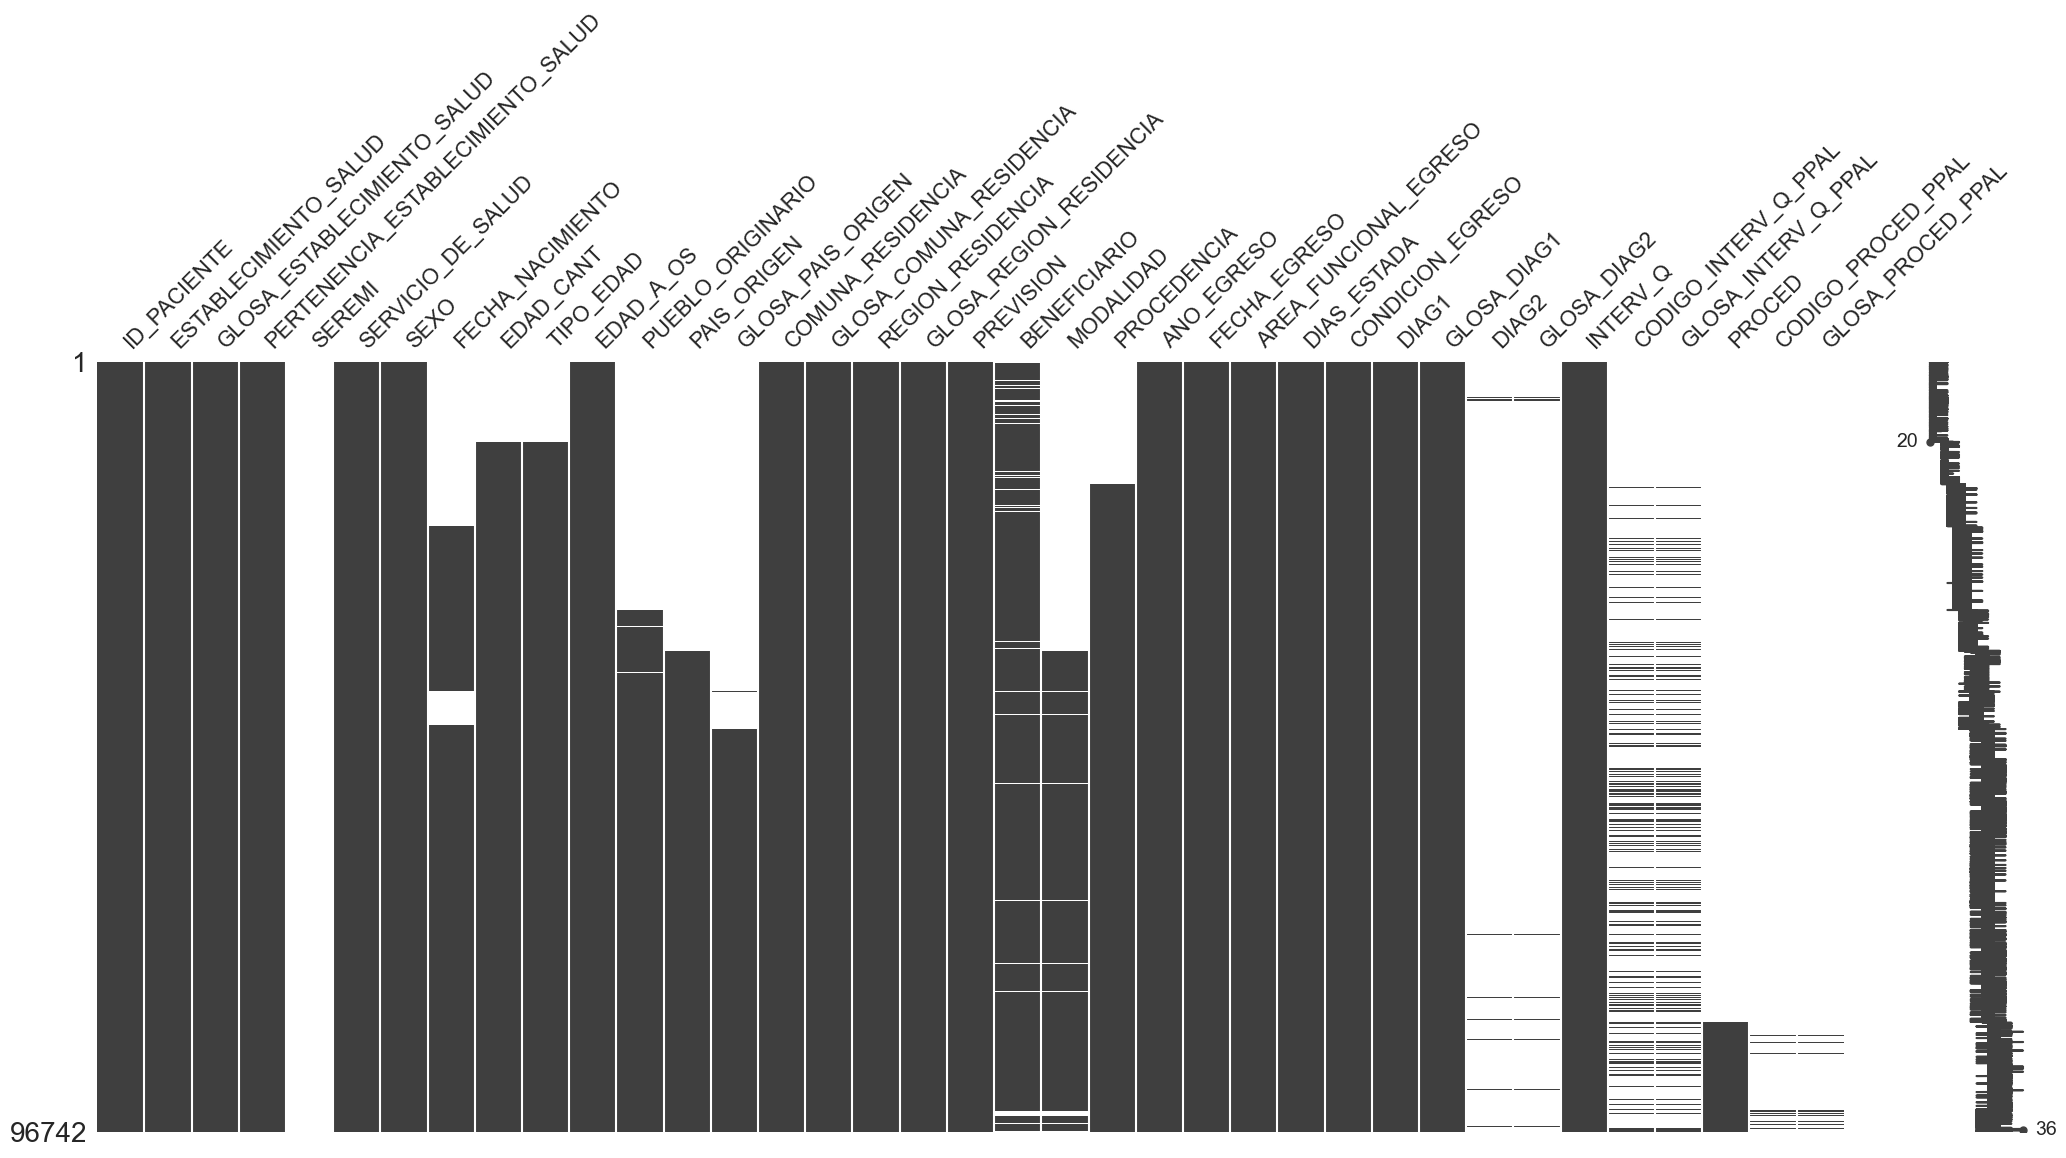

In [5]:
aux.analizar_valores_faltantes(torax_pandas)


## Cantidad de Dias Estada Totales

ANO_EGRESO
2001    51187
2002    56939
2003    53152
2004    51007
2005    49503
2006    48135
2007    50503
2008    47686
2009    45723
2010    48239
2011    48133
2012    43891
2013    51693
2014    45572
2015    44053
2016    44752
2017    44462
2018    43900
2019    42921
2020    31371
Name: DIAS_ESTADA, dtype: int64

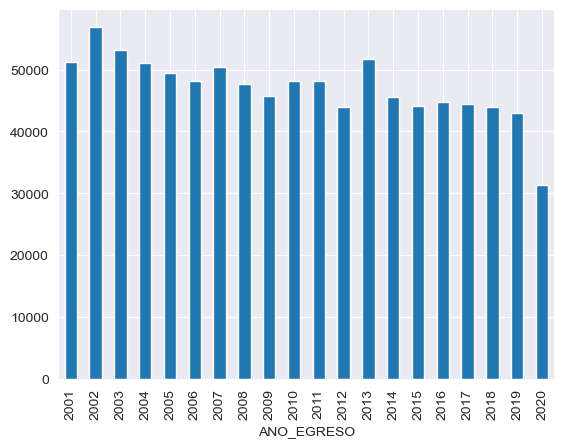

In [6]:
dias_estada_totales = torax_pandas.groupby("ANO_EGRESO")["DIAS_ESTADA"].sum()
display(dias_estada_totales)
dias_estada_totales.plot(kind="bar")
plt.show()

# Comparacion Resultados con GRD

- Los resultados que se obtuvieron en DEIS y GRD son los siguientes. Se compararan principalmente la cantidad de Egresos y Dias Estada.


|Base de datos|Métrica|2019|2020|
|-------------|-------|----|----|
DEIS|Número de Egresos|5345|2848|
GRD|Número de Egresos|7529|2853|
DEIS|Dias Estada Totales|42921 dias|31371 dias|
GRD|Dias Estada Totales|41889 dias|31032 dias|

- Número de Egresos:
    - 2019: GRD presenta más egresos hospitalarios que DEIS (7529 a 5435)
    - 2020: GRD presenta más egresos hospitalarios que DEIS (2853 a 2848)

- Dias Estada:
    - 2019: DEIS presenta más días de estada que GRD (42921 a 41889 días)
    - 2020: DEIS presenta más días de estada que GRD (31371 a 31032 días)

- Por lo tanto, se encontraron diferencias entre ambas bases de datos.

- Luego de una pesquiza de problemas, se corrigio la forma de procesar la base de datos GRD Publicos
y se obtuvieron los siguientes egresos hospitalarios.

|Base de datos|Métrica|2019|2020|
|-------------|-------|----|----|
DEIS|Número de Egresos|5345|2848|
GRD Publico|Número de Egresos|5435|2853|

- Por lo tanto, DEIS y GRD Publico coincide en 2019. GRD presenta 5 egresos mas que DEIS en 2020.

### Analisis con control GRD Interno

In [46]:
DIAGS_MAS_RELEVANTES = [
    "C340",
    "C341",
    "C342",
    "C343",
    "C381",
    "C384",
    "C450",
    "C780",
    "C782",
    "D143",
    "D381",
    "E848",
    "I080",
    "I081",
    "I340",
    "I350",
    "I351",
    "I352",
    "I420",
    "I456",
    "I472",
    "I495",
    "I710",
    "I712",
    "J398",
    "J679",
    "J841",
    "J848",
    "J849",
    "J860",
    "J869",
    "J90",
    "J91",
    "J931",
    "J955",
    "J980",
    "M348",
    "Q211",
    "Q231",
    "Q676",
    "T820",
    "T821",
    "Z450",
]


#### Control Publico - DEIS

In [47]:
torax_relevantes = torax_pandas[torax_pandas["DIAG1"].isin(DIAGS_MAS_RELEVANTES)]
control_calidad_publico = (
    torax_relevantes.groupby(["ANO_EGRESO", "DIAG1"])
    .agg(n_egresos=("DIAG1", "count"))
    .reset_index()
)

control_calidad_publico = control_calidad_publico.query("ANO_EGRESO >= 2011")
control_calidad_publico["ANO_EGRESO"] = control_calidad_publico["ANO_EGRESO"].astype(int)
control_calidad_publico["n_egresos"] = control_calidad_publico["n_egresos"].astype("Int64")

#### Control Interno GRD

In [52]:
control_interno_2 = pd.read_excel("Dg más frecuentes 2011-2022.xlsx", header=3)

codigos_egresos_2 = (
    control_interno_2["Diag 01 Principal (cod+des)"].str.split("-").str[0].str.strip()
)

control_interno_2.insert(1, "DIAGNOSTICO1", codigos_egresos_2)
control_interno_2 = control_interno_2.iloc[:-1, 1:-1]
control_interno_2.columns = ["DIAGNOSTICO1"] + list(range(2011, 2023))
control_interno_2 = pd.melt(
    control_interno_2,
    id_vars="DIAGNOSTICO1",
    value_vars=range(2011, 2023),
    var_name="ANIO_EGRESO",
    value_name="n_egresos",
)

control_interno_2 = control_interno_2.query("ANIO_EGRESO <= 2020")
control_interno_2["ANIO_EGRESO"] = control_interno_2["ANIO_EGRESO"].astype(int)
control_interno_2["n_egresos"] = control_interno_2["n_egresos"].astype("Int64")
control_interno_2["DIAGNOSTICO1"] = control_interno_2['DIAGNOSTICO1'].str.replace(".", "", regex=False)
control_interno_2 = control_interno_2.rename(columns={"ANIO_EGRESO": "ANO_EGRESO",
                                                      "DIAGNOSTICO1": "DIAG1"})
control_interno_2 = control_interno_2[~control_interno_2["DIAG1"].isin(["C33", "J91", "J90",
                                                                              "J47"])]

#### Comparacion de Resultados - Control Publico - Control Interno GRD

In [53]:
comparacion = pd.merge(
    control_calidad_publico,
    control_interno_2,
    how="outer",
    on=["DIAG1", "ANO_EGRESO"],
    suffixes=("_DEIS", "_GRD_interno"),
    indicator=True,
)

In [54]:
display(comparacion.query('_merge != "both"'))

,ANO_EGRESO,DIAG1,n_egresos_DEIS,n_egresos_GRD_interno,_merge
406,2011,M348,<NA>,<NA>,right_only
407,2013,Q231,<NA>,<NA>,right_only
408,2014,T820,<NA>,6,right_only
409,2015,Q231,<NA>,<NA>,right_only


In [45]:
torax_pandas.query("DIAG1 == 'Q231'").groupby("ANO_EGRESO").agg(n_egresos=("DIAG1", "count"))

,n_egresos
ANO_EGRESO,
2011,1
2012,1
2014,4
2016,2
2017,1
2018,1
2019,2
2020,19
